In [2]:
import numpy as np
import pandas as pd
from pprint import pprint

## 1. Importing the dataset

In [3]:
def print_dataset_information(dataset: pd):
    dataset = pd.read_csv('../../Dataset/breast_cancer_wisconsin.csv');
    print("Dataset Information");
    print("__________________________")
    pprint(dataset.info());
    print("\n")
    print("Number of null data:\n")
    print("__________________________")
    pprint(pd.isnull(dataset).sum())
    

def cnt_null_value(dataset: pd):
    print("Number of null data:\n")
    print("__________________________")
    pprint(pd.isnull(dataset).sum())

In [4]:
dataset = pd.read_csv('../../Dataset/breast_cancer_wisconsin.csv');
print_dataset_information(dataset=dataset)

Dataset Information
__________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


Number of null data:

__________________________
Clump_thickness                 0
Uniformity_

In [5]:
threshold = 0.05;

if dataset.isna().sum().sum() / dataset.size < threshold:
    dataset = dataset.dropna()
else:
    for col in dataset.columns:
        if dataset[col].dtype in ['float64', 'int64']:
            # Điền NaN bằng mean cho dữ liệu số
            dataset[col] = dataset[col].fillna(dataset[col].mean())
        else:
            # Điền NaN bằng giá trị phổ biến nhất cho dữ liệu dạng object/categorical
            dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

cnt_null_value(dataset=dataset)

Number of null data:

__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


## Check for imbalance

In [6]:
# Visualize class distribution
import matplotlib.pyplot as plt

def visualize_imbalance(class_counts):
    plt.figure(figsize=(10, 4))

    # Bar plot
    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Class Distribution (Count)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Benign (2)', 'Malignant (4)'], rotation=0)

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=['Benign (2)', 'Malignant (4)'], 
            autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Class Distribution (Percentage)')

    plt.tight_layout()
    plt.show()
    
    
def print_class_distribution_percentage(dataset: pd):
    # Check class distribution for imbalance
    print("Class Distribution:")
    print("=" * 30)
    class_counts = dataset['Class'].value_counts()
    print(class_counts)
    print(f"\nClass Distribution Percentages:")
    class_percentages = dataset['Class'].value_counts(normalize=True) * 100
    print(class_percentages)
    return class_counts, class_percentages;

Class Distribution:
Class
2    444
4    239
Name: count, dtype: int64

Class Distribution Percentages:
Class
2    65.007321
4    34.992679
Name: proportion, dtype: float64


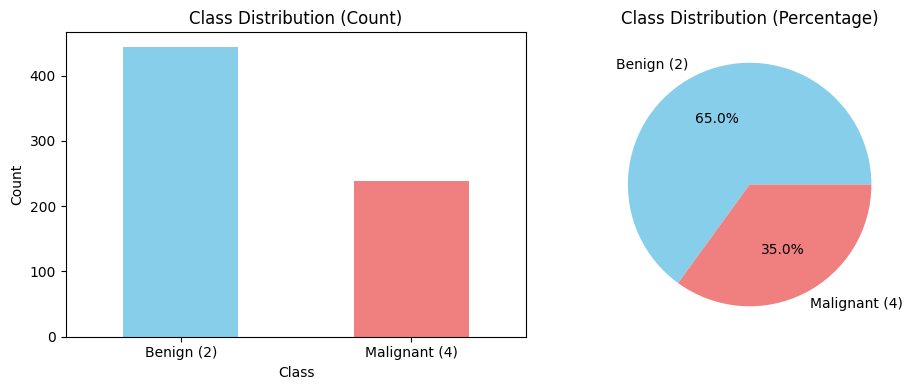


Imbalance Analysis:
Benign (2): 65.0%
Malignant (4): 35.0%
⚠️  Dataset is IMBALANCED (difference > 20%)


In [7]:
class_counts, class_percentages = print_class_distribution_percentage(dataset=dataset)
visualize_imbalance(class_counts=class_counts)

# Check if dataset is imbalanced
benign_ratio = class_percentages[2] if 2 in class_percentages else 0
malignant_ratio = class_percentages[4] if 4 in class_percentages else 0

print(f"\nImbalance Analysis:")
print(f"Benign (2): {benign_ratio:.1f}%")
print(f"Malignant (4): {malignant_ratio:.1f}%")

if abs(benign_ratio - malignant_ratio) > 20:
    print("⚠️  Dataset is IMBALANCED (difference > 20%)")
else:
    print("✅ Dataset is relatively BALANCED")

## Declare features and dependant variables

In [8]:
X = dataset.iloc[:,:-1].values;
pprint(X)
print("_______________________________________________");
for i in range(len(dataset.columns)-1):
    print(f"  Column {i}: {dataset.columns[i]}")

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])
_______________________________________________
  Column 0: Clump_thickness
  Column 1: Uniformity_of_cell_size
  Column 2: Uniformity_of_cell_shape
  Column 3: Marginal_adhesion
  Column 4: Single_epithelial_cell_size
  Column 5: Bare_nuclei
  Column 6: Bland_chromatin
  Column 7: Normal_nucleoli
  Column 8: Mitoses


In [9]:
y = dataset.iloc[:, -1].values;
pprint(y);

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [23]:
for i in range(y.size - 1):
    if y[i] == 2: y[i] = 0;
    elif y[i] == 4: y[i] = 1;
        
pprint(y)
print("_________________");
print(y.size)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

print("DataSet Splitting:");
print("_______________________________")
print("X_train: ", np.size(X_train));
print("X_test: ", np.size(X_test));
print("y_train:", np.size(y_train));
print("y_test", np.size(y_test));

DataSet Splitting:
_______________________________
X_train:  4914
X_test:  1233
y_train: 546
y_test 137


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler;

sc = StandardScaler();
X_train = sc.fit_transform(X_train);
X_test=sc.transform(X_test);

pprint("X_test")
pprint(X_test)
pprint("_______________________")
pprint("X_train")
pprint(X_train)

'X_test'
array([[-1.22468404, -0.69781134, -0.74152574, ..., -0.99628733,
        -0.62157783, -0.33863738],
       [-0.51066644, -0.69781134, -0.74152574, ..., -0.59244703,
        -0.62157783, -0.33863738],
       [ 0.20335117,  0.60365746,  0.60468558, ...,  0.21523357,
         0.0230214 , -0.33863738],
       ...,
       [-0.15365763, -0.69781134, -0.74152574, ..., -0.99628733,
        -0.62157783, -0.33863738],
       [-0.15365763,  2.23049348,  0.26813275, ...,  2.23443506,
         2.27911872, -0.33863738],
       [-0.86767524, -0.69781134, -0.74152574, ..., -0.59244703,
        -0.62157783, -0.33863738]])
'_______________________'
'X_train'
array([[ 1.98839518, -0.69781134, -0.74152574, ...,  0.61907387,
         0.34532102, -0.33863738],
       [-1.22468404, -0.69781134, -0.74152574, ..., -0.18860673,
        -0.62157783, -0.33863738],
       [ 0.20335117, -0.69781134, -0.74152574, ..., -0.18860673,
        -0.62157783, -0.33863738],
       ...,
       [-1.22468404, -0.697811

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score;

scoring = {
    'f1_macro': 'f1_macro',
    'accuracy': 'accuracy'
}

In [14]:
from sklearn.linear_model import LogisticRegression;

classifier_logistic_regression = LogisticRegression(random_state=0, class_weight="balanced");
classifier_logistic_regression.fit(X_train, y_train);

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold;


cv_strategy = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

parameters_logistic_regression = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
};

grid_search_logistic_regression = GridSearchCV(
    classifier_logistic_regression,
    param_grid=parameters_logistic_regression,
    cv=cv_strategy,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid_search_logistic_regression.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=0, shuffle=True),
             error_score='raise',
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro'},
             verbose=1)

## Training the Decision Tree model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier;

classifier_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=10);
classifier_decision_tree.fit(X_train, y_train);

## Training the Random Forest model on the Training set

In [120]:
from sklearn.ensemble import RandomForestClassifier;

classifier_random_forest = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0);
classifier_random_forest.fit(X_train, y_train);

## Training the Kerrnel SVM model on the Training Set

In [ ]:
from sklearn.svm import SVC;

classifier_svm = SVC(kernel='rbf', random_state=0);
classifier_svm.fit(X_train, y_train);

In [118]:
y_pred=classifier_svm.predict(X_test);

## Training KNN NeighBourModel on the Training Set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier;

classifier_knn_neighbour = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2);
classifier_knn_neighbour.fit(X_train, y_train);

## Training the Linear SVM model on the Training set